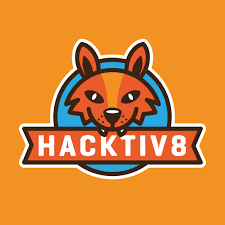

# Final Project 3 - Ensemble

#### Kelompok 5: 
    1. Rivayo Aldoni Aritonang (PYTN-KS09-007)
    2. Ansharulhaq Aminsyah (PYTN-KS09-012)


# Latar Belakang

Pada project kali ini membahas tentang penerapan Ensemble dengan menggunakan Random Forest. Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi data pasien yang memiliki penyakit jantung. Dataset ini terdiri dari 299 baris dan 13 kolom yang dapat diakses pada link https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data.
Atribut yang menjadi variabel target adalah DEATH_EVENT yang berisi "0" (pasien sudah meninggal saat waktu follow-up) dan "1" (pasien belum meninggal saat waktu follow-up).

# Objective

Project ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
* Mampu memahami konsep Classification dengan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

from scipy import stats

# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import PowerTransformer

# Data Loading

**Menampilkan 5 data teratas dan 5 data terbawah.**

In [2]:
df = pd.read_csv('heart_failure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Menampilkan jumlah data non-null dan tipe data dari masing-masing kolomnya**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Dimension of dataframe**

In [4]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
299 baris
13 kolom


**Index dataframe**

In [5]:
df.index

RangeIndex(start=0, stop=299, step=1)

**View column names**

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**View number unique data**

In [7]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

**Display unique value**

In [8]:
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
--------------------------------------------------------------------------------
Nilai Unique Kolom anaemia
[0 1]
--------------------------------------------------------------------------------
Nilai Unique Kolom creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898

**View Basic statistic column**

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Analisis :**

Berdasarkan hasil diatas dapat disimpulkan : 
1. Dimensi data sejumlah 299 baris dan 13 kolom dengan 3 kolom dengan tipe data float64 dan 10 kolom dengan tipe data numerik atau integer.
2. Kolom terdiri dari 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'.
3. Nilai Unique tiap kolom sejumlah : age = 47 nilai unique, anaemia = 2 nilai unique, creatinine_phosphokinase = 208 nilai unique, diabetes = 2 nilai unique, ejection_fraction = 17 nilai unique, high_blood_pressure = 2 nilai unique, platelets = 176 nilai unique, serum_creatinine = 40 nilai unique, serum_sodium = 27 nilai unique, sex = 2 nilai unique, smoking = 2 nilai unique, time = 148 nilai unique, DEATH_EVENT = 2 nilai unique.

# Data Cleaning

**View number of missing value**

In [10]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values() #Check if any column has null values

Jumlah Missing Value tiap column: 


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Check duplicate data**

In [11]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) 

Jumlah Duplicate Data  0


**Find categorical variables**

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


**Find numerical variables**

In [13]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


**Analisis :**

Beberapa hal yang dilakukan dalam data Cleaning :
1. Mendeklarasikan categorical variable dan numerical variable
2. Karena sebelumnya tidak ditemukan missing value, jadi tidak perlu dilakukan pengisian.
3. Tidak ditemukan nilai null pada dataset ini.
5, Tidak ditemukan duplicate data.

# Exploratory Data Analisis & Visualization

1. Analisis pengaruh fitur umur dengan DEATH_EVENT

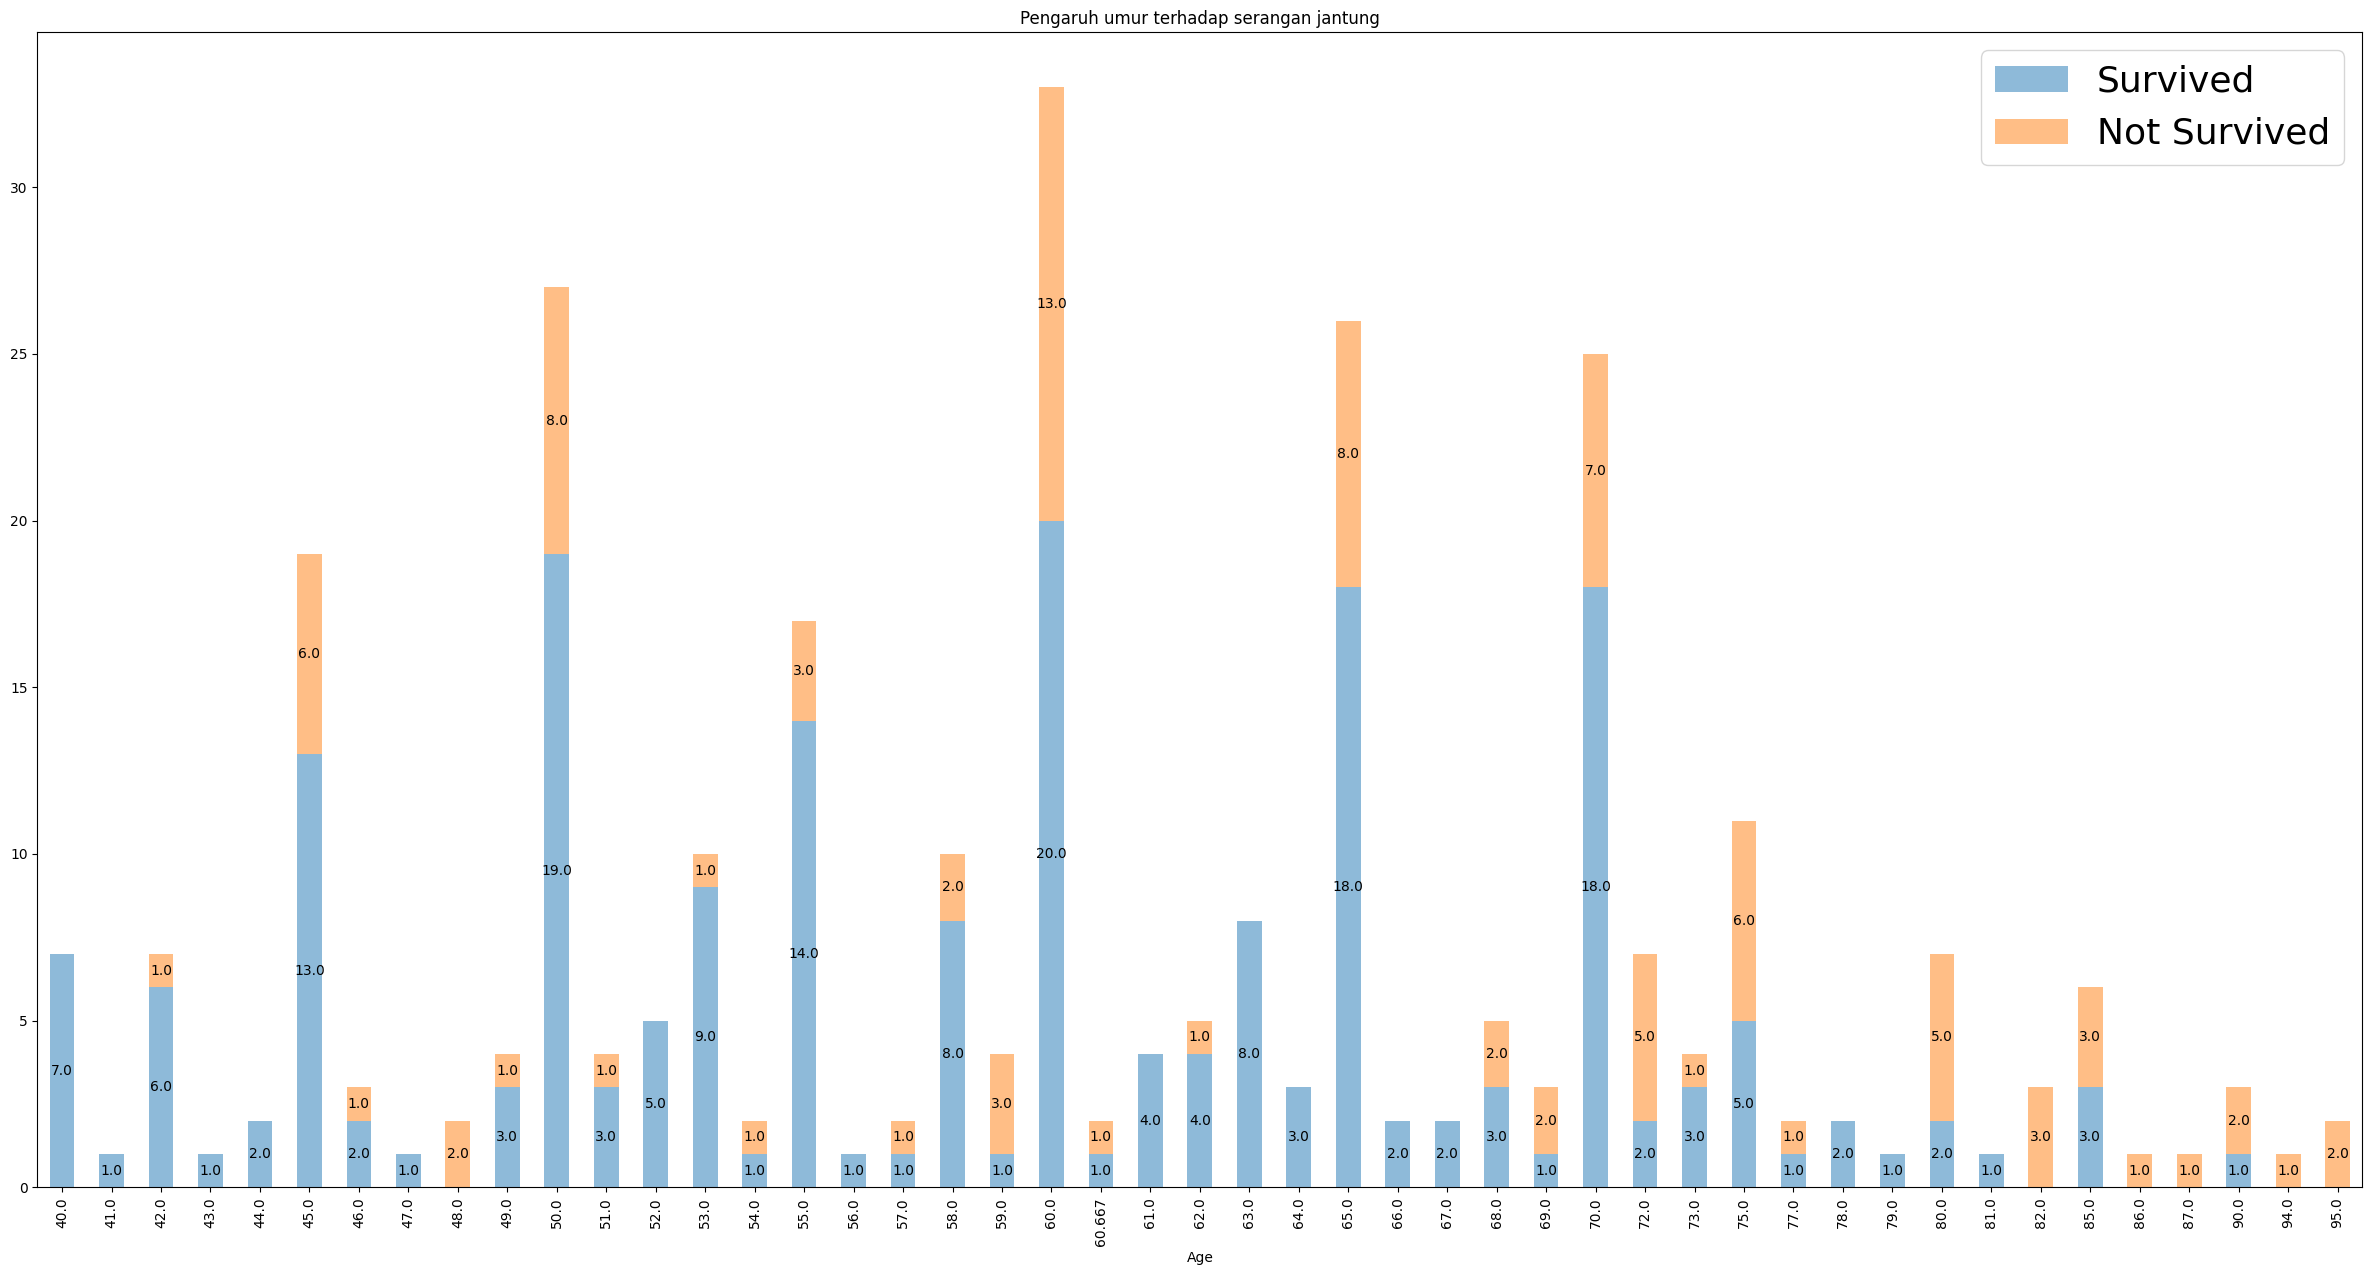

In [14]:
df_age = df.pivot_table(
    index='age',
    columns='DEATH_EVENT',
    values='time', #tidak ada tujuan menggunakan time, dikarenakan kita hanya ingin mengambil nilai count baris, jadi kolom apapun bisa digunakan.
    aggfunc='count'
)
plot = df_age.plot(kind='bar', stacked=True, figsize=(30, 15), alpha=0.5)
L = plt.legend(prop={'size': 26})
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Not Survived')
plt.title('Pengaruh umur terhadap serangan jantung')
plt.xlabel('Age')
for mean in plot.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
plt.show()

2. Melihat pengaruh fitur Waktu dengan DEATH_EVENT

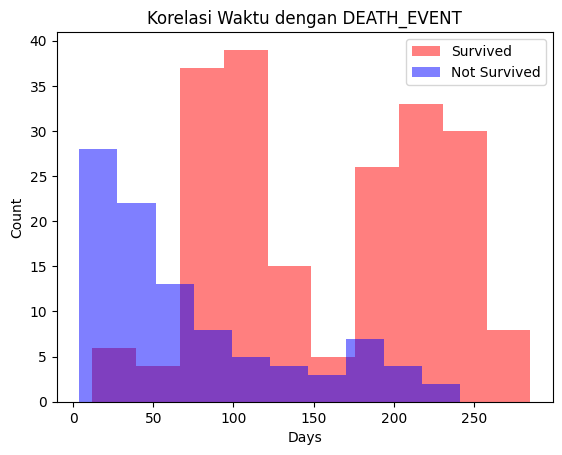

In [15]:
df[df["DEATH_EVENT"] == 0]['time'].plot(kind='hist', color='red', label='Survived', alpha=0.5)
df[df["DEATH_EVENT"] == 1]['time'].plot(kind='hist', color='blue', label='Not Survived', alpha=0.5)
plt.title('Korelasi Waktu dengan DEATH_EVENT')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.show()

3. Melihat pengaruh fitur sex dengan DEATH_EVENT

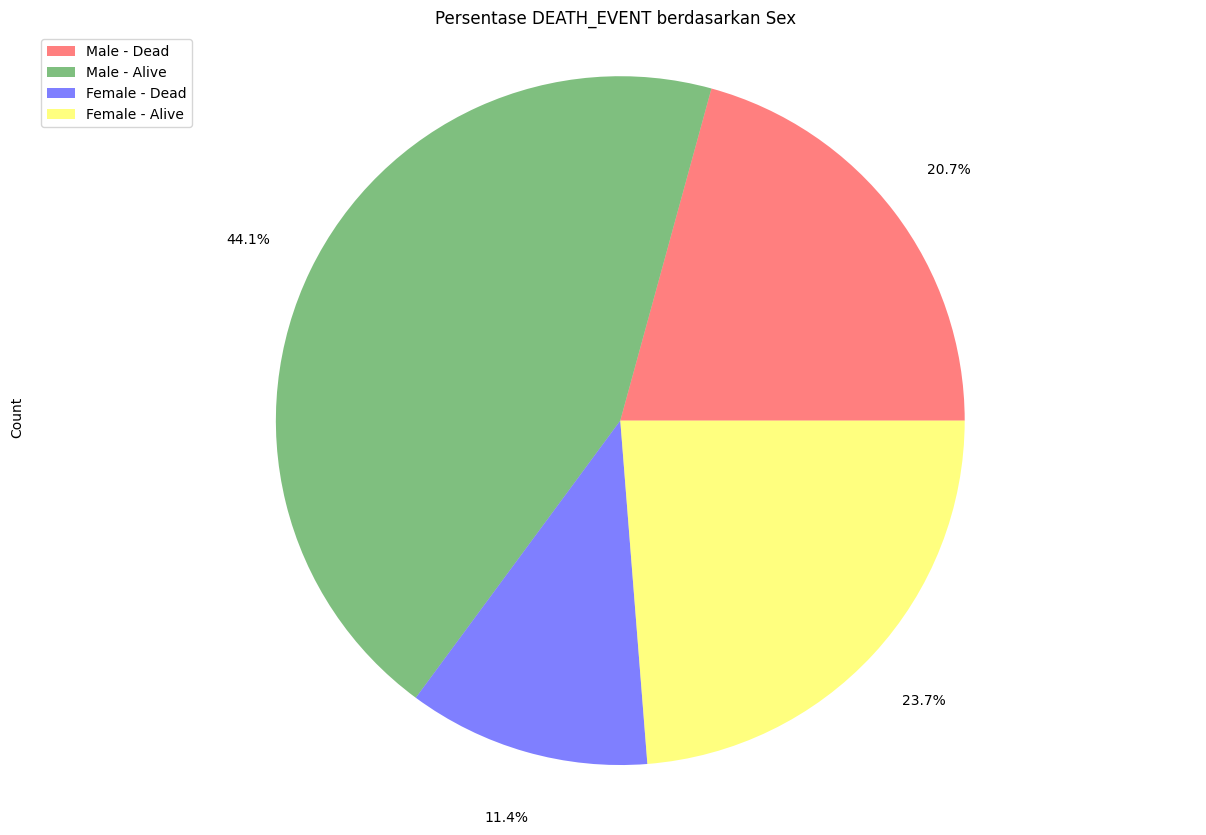

In [16]:
male = df[df['sex'] == 1]
female = df[df['sex'] == 0]
male_dead = len(male[male['DEATH_EVENT'] == 1])
male_alive = len(male[male['DEATH_EVENT'] == 0])
female_dead = len(female[female['DEATH_EVENT'] == 1])
female_alive = len(female[female['DEATH_EVENT'] == 0])

values = pd.DataFrame([male_dead, male_alive, female_dead, female_alive], columns={'Count'})
values['Count'].plot(kind="pie", 
                     figsize=(15,10), 
                     autopct="%1.1f%%",
                     pctdistance=1.2, 
                     labels=None, 
                     colors=['red','green','blue','yellow'], 
                     wedgeprops = {"alpha": 0.5})
labels = ['Male - Dead', 'Male - Alive', 'Female - Dead', 'Female - Alive']
plt.title("Persentase DEATH_EVENT berdasarkan Sex")
plt.axis("equal")
plt.legend(labels=labels, loc="upper left")
plt.show()

4. Analisis anemia, diabetes, darah tinggi, maupun merokok terhadap resiko terkena serangan jantung

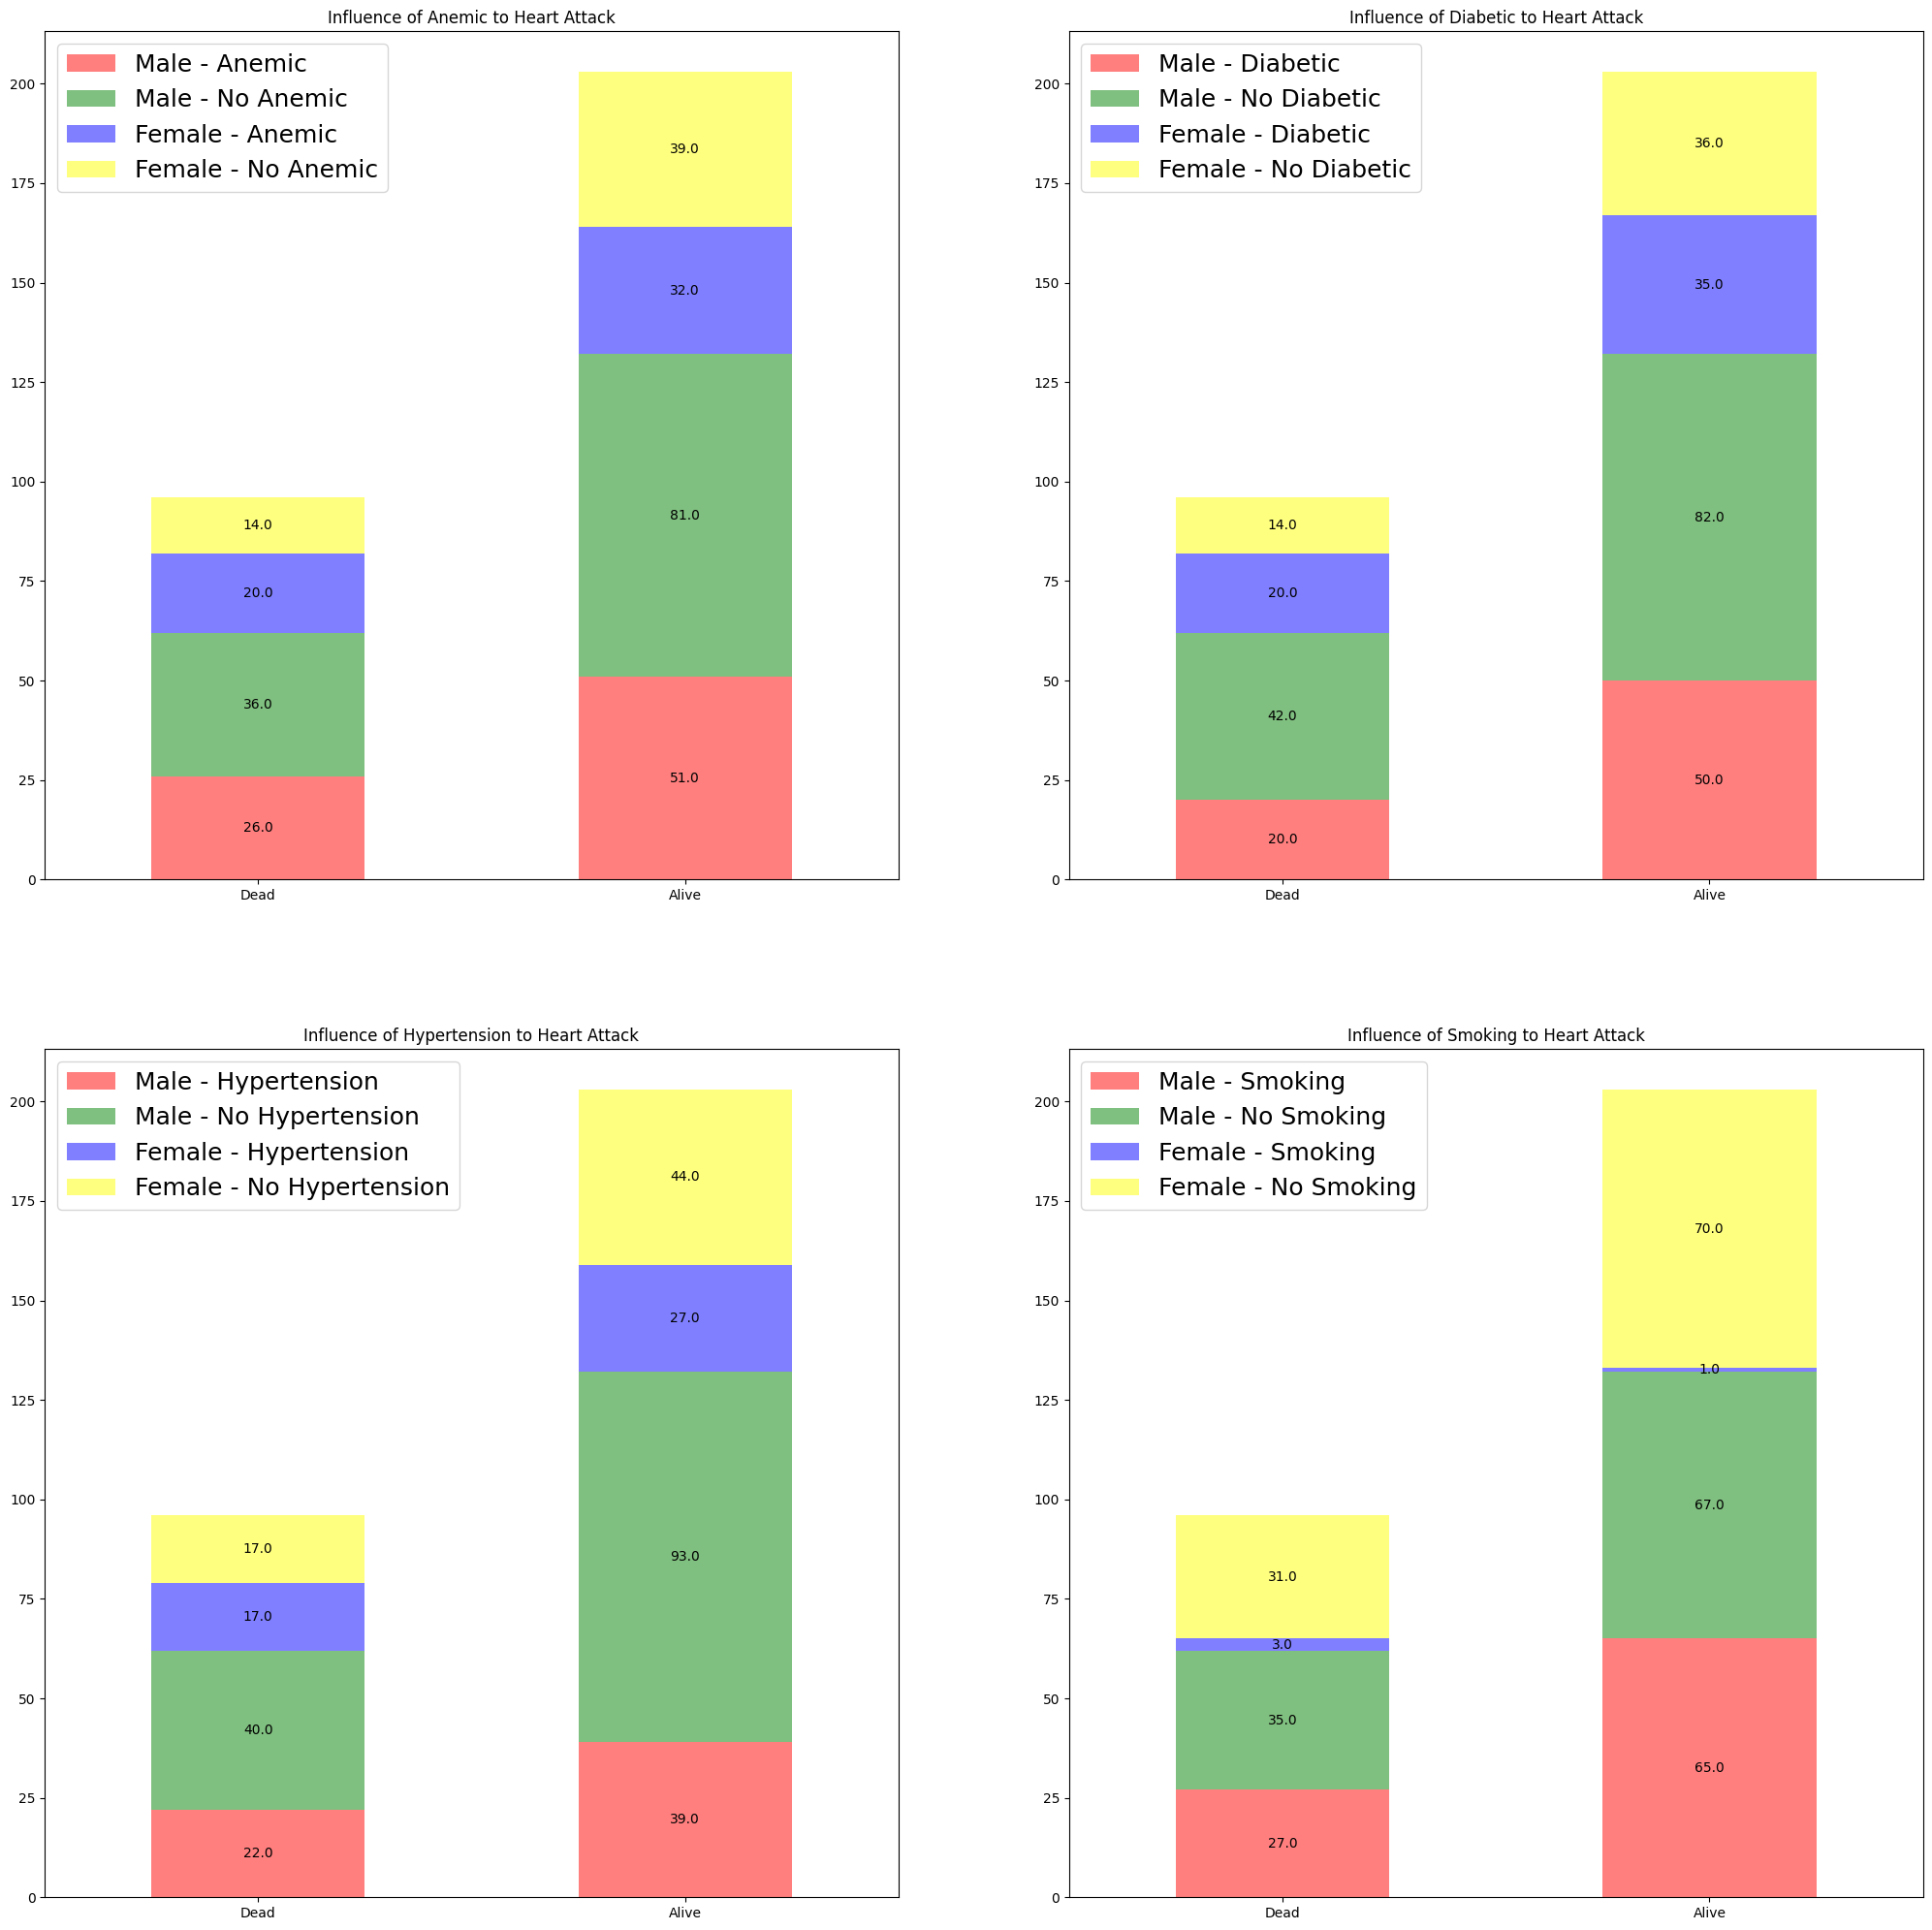

In [17]:
fig = plt.figure(figsize=(25, 25))
columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
colnames = ['Anemic', 'Diabetic', 'Hypertension', 'Smoking']
for i in range(len(columns)):
    m_problem = male[male[columns[i]] == 1]
    m_noproblem = male[male[columns[i]] == 0]
    m_problem_dead = len(m_problem[m_problem['DEATH_EVENT'] == 1])
    m_problem_alive = len(m_problem[m_problem['DEATH_EVENT'] == 0])
    m_noproblem_dead = len(m_noproblem[m_noproblem['DEATH_EVENT'] == 1])
    m_noproblem_alive = len(m_noproblem[m_noproblem['DEATH_EVENT'] == 0])

    f_problem = female[female[columns[i]] == 1]
    f_noproblem = female[female[columns[i]] == 0]
    f_problem_dead = len(f_problem[f_problem['DEATH_EVENT'] == 1])
    f_problem_alive = len(f_problem[f_problem['DEATH_EVENT'] == 0])
    f_noproblem_dead = len(f_noproblem[f_noproblem['DEATH_EVENT'] == 1])
    f_noproblem_alive = len(f_noproblem[f_noproblem['DEATH_EVENT'] == 0])

    dead = [m_problem_dead, m_noproblem_dead, f_problem_dead, f_noproblem_dead]
    alive = [m_problem_alive, m_noproblem_alive, f_problem_alive, f_noproblem_alive]
    df_problem = pd.DataFrame(
        [dead, alive], 
        columns=['Male - {}'.format(colnames[i]), 
                 'Male - No {}'.format(colnames[i]), 
                 'Female - {}'.format(colnames[i]), 
                 'Female - No {}'.format(colnames[i])], 
        index=['Dead', 'Alive'])
    ax = fig.add_subplot(2, 2, i+1)
    plot = df_problem.plot(kind='bar', stacked=True, ax=ax, color=['red', 'green', 'blue', 'yellow'], alpha=0.5)
    ax.set_title('Influence of {} to Heart Attack'.format(colnames[i]))
    plt.xticks(rotation='horizontal')
    plt.legend(prop={'size': 18})
    for mean in plot.containers:
        labels = [v.get_height() if v.get_height() > 0 else '' for v in mean]
        plot.bar_label(mean, labels=labels, label_type='center')

plt.show()

4. Analisis creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium terhadap resiko terkena serangan jantung

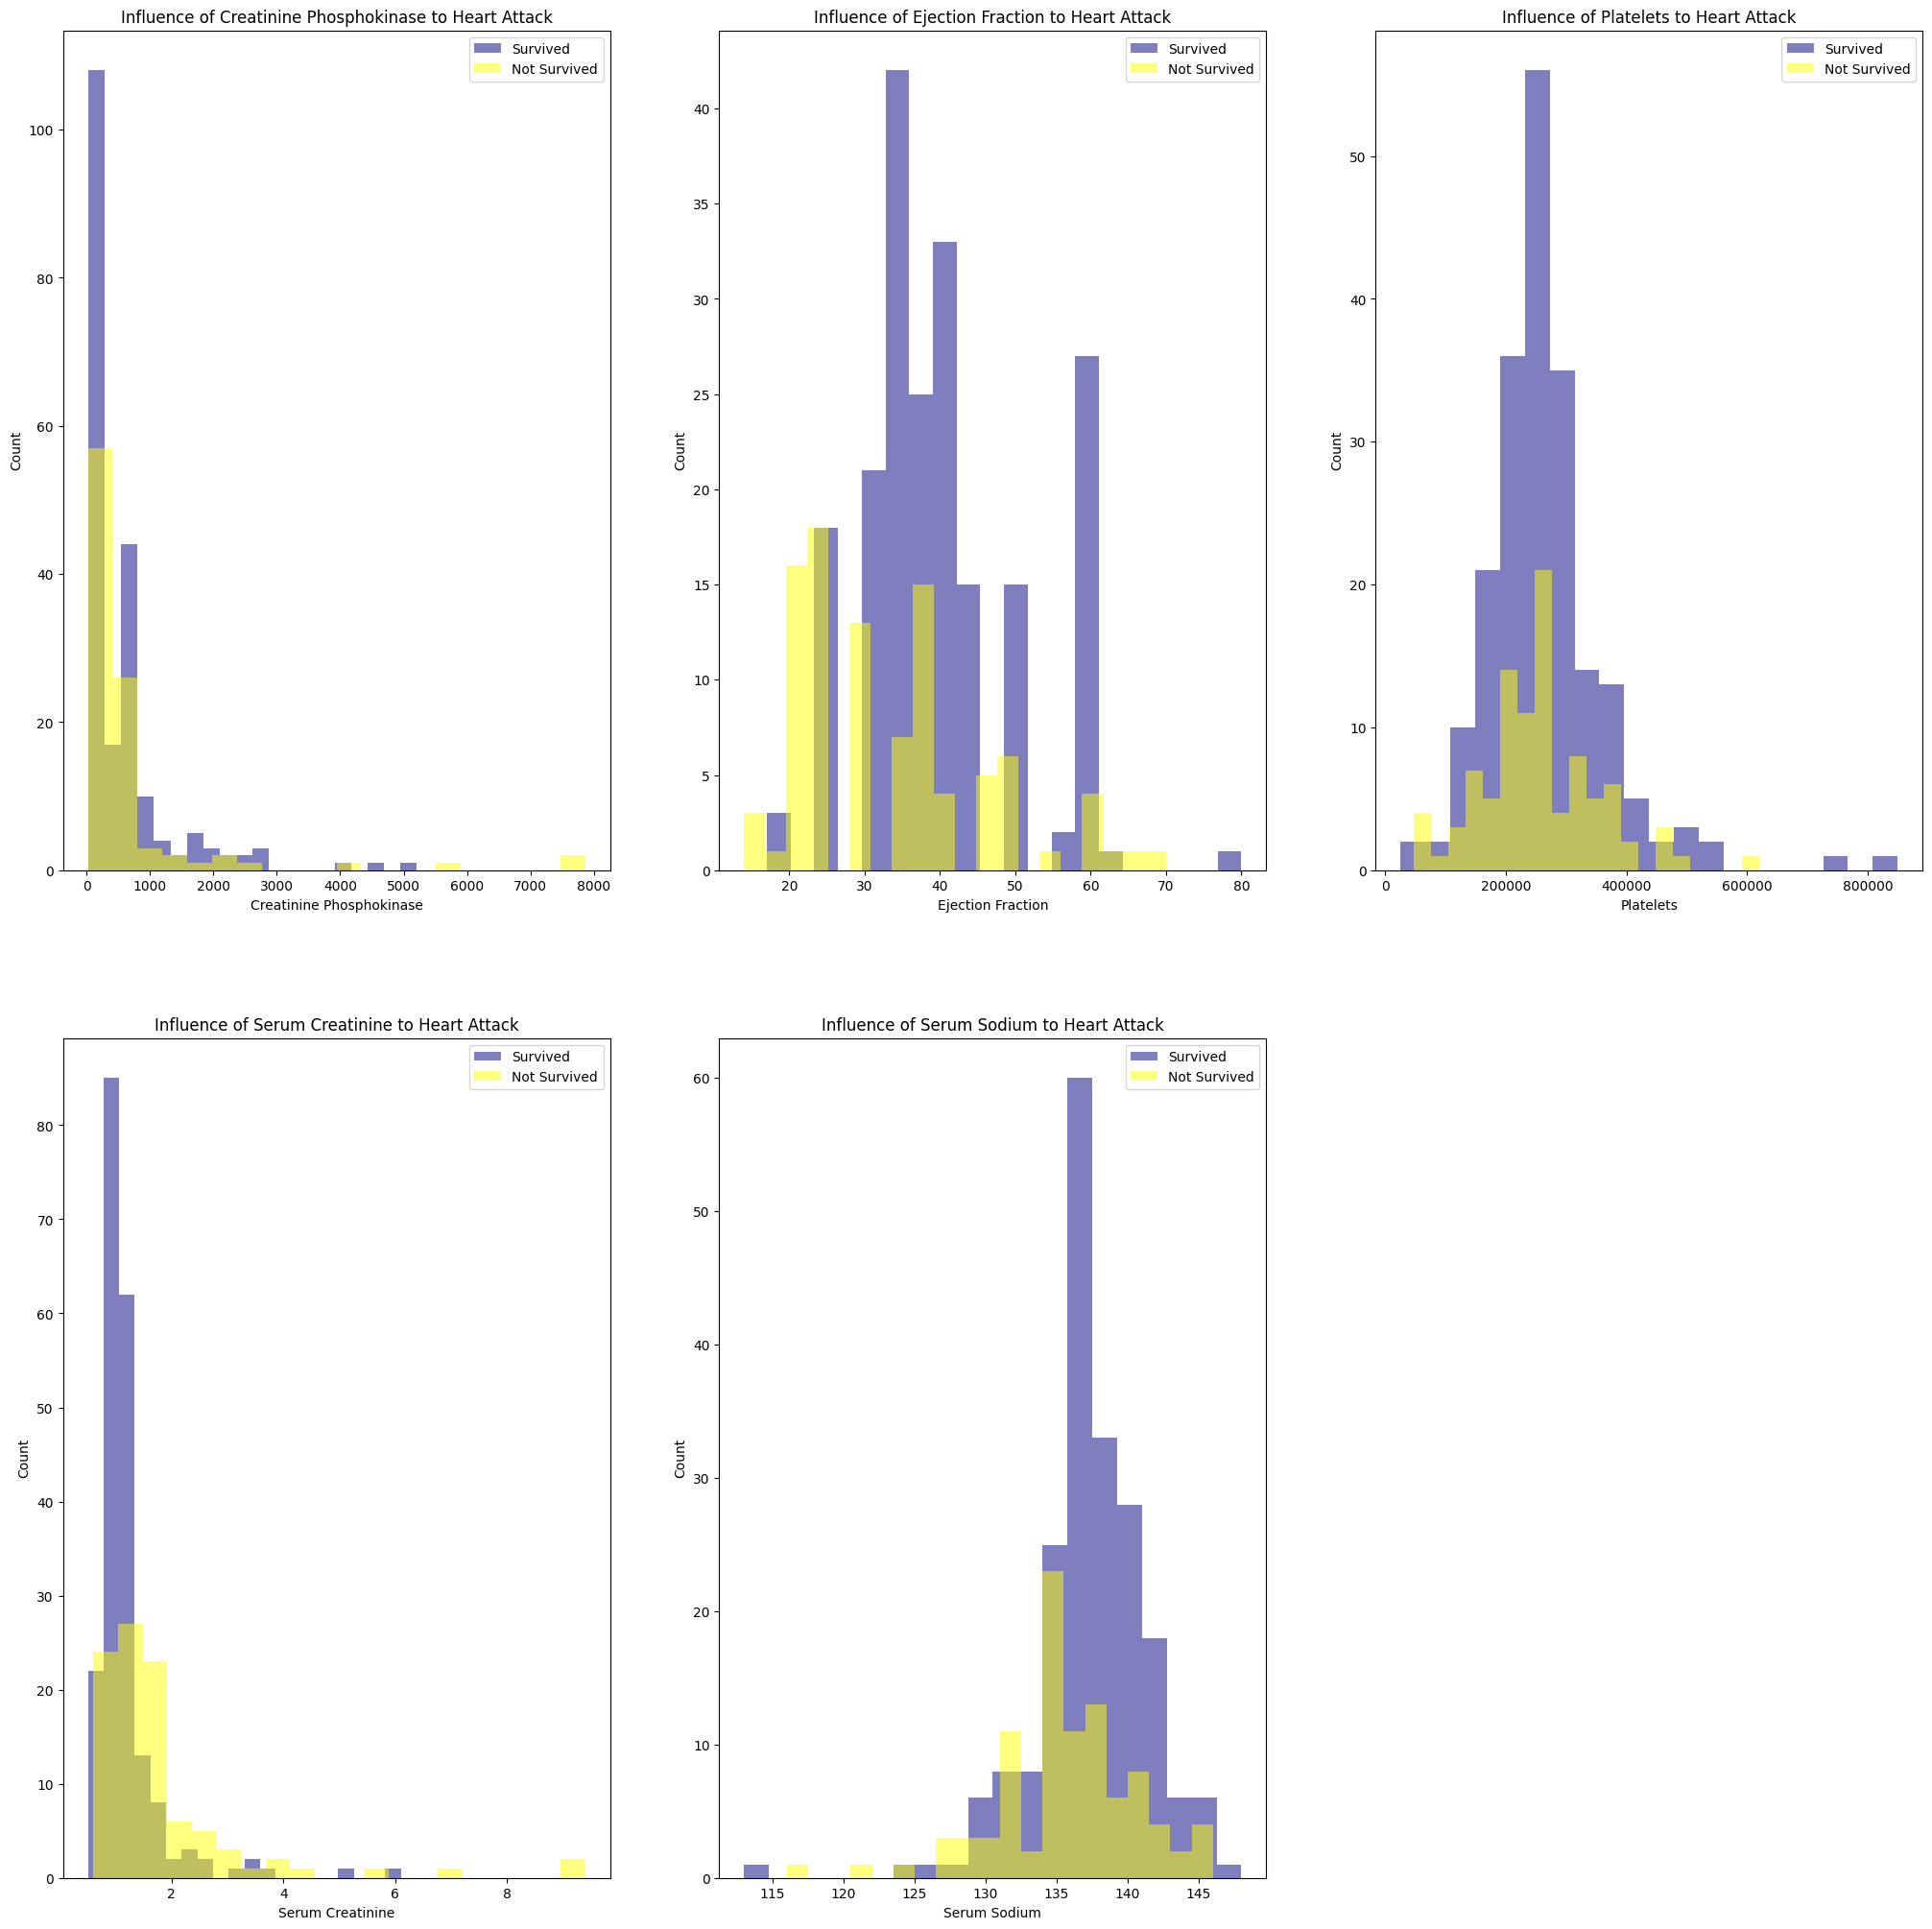

In [18]:
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
colnames = ['Creatinine Phosphokinase', 'Ejection Fraction', 'Platelets', 'Serum Creatinine', 'Serum Sodium']
fig = plt.figure(figsize=(25, 25))
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    df[df["DEATH_EVENT"] == 0][columns[i]].plot(kind='hist', bins=20, color='navy', label='Survived', alpha=0.5)
    df[df["DEATH_EVENT"] == 1][columns[i]].plot(kind='hist', bins=20, color='yellow', label='Not Survived', alpha=0.5)
    plt.title('Influence of {} to Heart Attack'.format(colnames[i]))
    plt.legend()
    plt.xlabel(colnames[i])
    plt.ylabel('Count')

**Correlation**

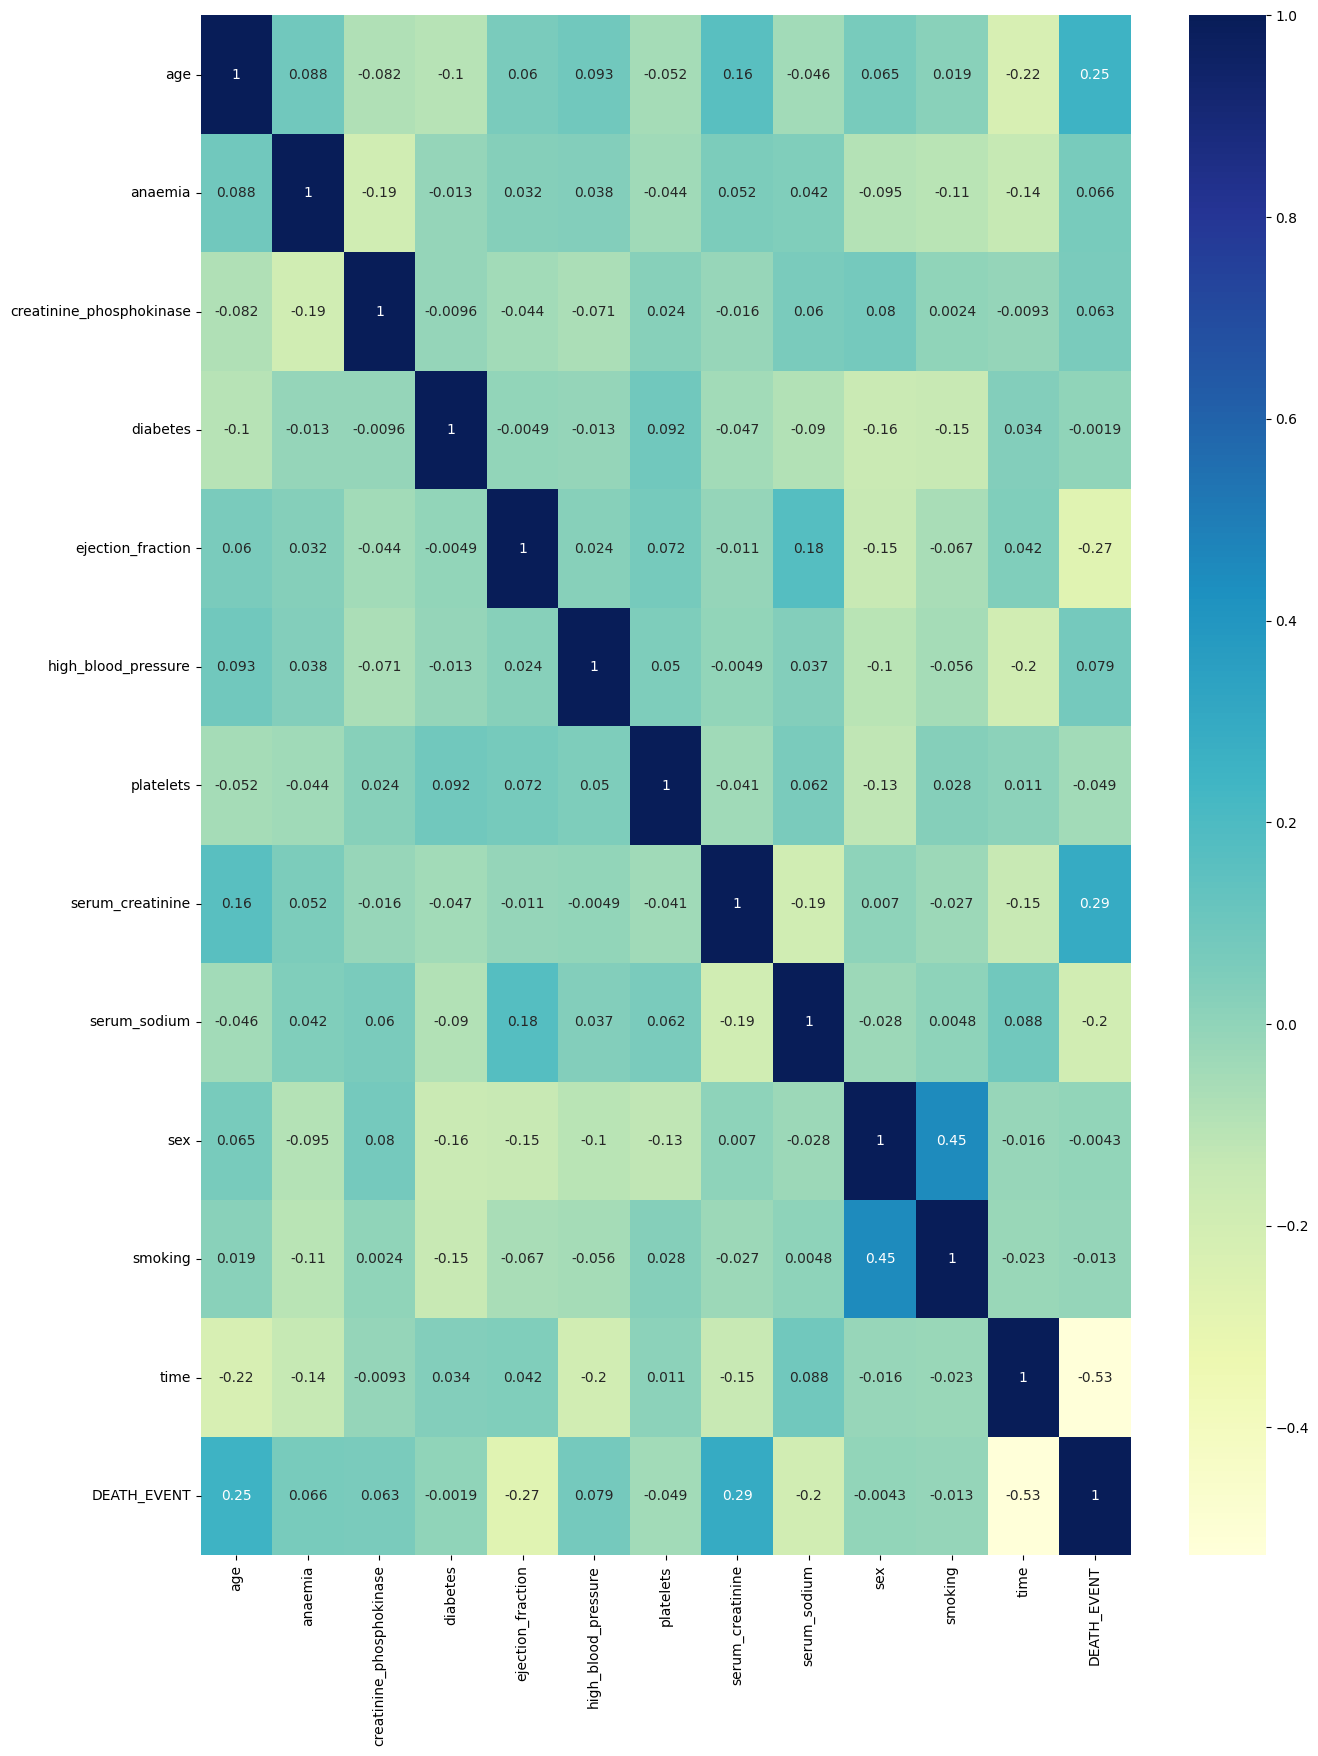

In [19]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Analisis :**
1. Berdasarkan analisis pada fitur umur, umur diatas 70 memiliki tingkat kematian yang jauh lebih banyak, sedangkan umur 40-70 lebih banyak yang hidup dibandingkan dengan yang mati. Dapat disimpulkan semakin tua seseorang, maka kemungkinan mati dikarenakan serangan jantung cukup tinggi.
2. Berdasarkan analisis pada fitur waktu, resiko terjadi serangan jantung jauh lebih kecil jika sudah lama dilakukan follow-up (bantuan), tetapi jika bantuannya baru beberapa hari, biasanya banyak yang sudah meninggal. Jadi waktu follow-up memiliki pengaruh terhadap serangan jantung.
3. Berdasarkan analisis pada fitur sex, dapat disimpulkan gender memiliki pengaruh yang kecil terhadap kematian dikarenakan pria dan wanita sama - sama memiliki kemungkinan hidup yang tinggi meskipun pada visualisasi terlihat persentase pria lebih besar, tetapi ini dikarenakan jumlah pria lebih banyak hampir 2 kali dari wanita.
4. Berdasarkan analisis pada fitur anemia, diabetes, hipertensi, dan merokok menunjukkan bahwa jumlah yang anemia, diabetes, hipertensi, dan merokok memiliki jumlah yang lebih rendah dibandingkan yang tidak anemia, tidak diabetes, tidak hipertensi, dan tidak merokok sehingga kemungkinan terkena serangan jantung hampir sama bagi mereka yang anemia, diabetes, hipertensi, maupun merokok dengan yang tidak.
5. Berdasarkan analisis pada fitur creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium
    * creatinine_phosphokinase
        Creatinine Phosphokinase yang rendah dapat mengurangi kemungkinan terkena serangan jantung. Sehingga jumlah Creatinine Phosphokinase ada korelasi dengan serangan jantung.
    * ejection_fraction
        Semakin tinggi persentase Ejection Fraction-nya, maka semakin tinggi kemungkinan hidup seseorang. Jika persentase sudah dibawah 30, maka resiko terkena serangan jantung jauh lebih tinggi. Bisa disimpulkan bahwa Ejection Fraction memiliki pengaruh terhadap kemungkinan terjadinya serangan jantung.
    * platelets
        Berdasarkan visualisasi sebelumnya Jumlah Platelet tidak terlalu mempengaruhi terhadap serangan jantung dikarenakan tidak adanya jumlah perbedaan yang signifikan dengan yang mati dengan yang tidak.
    * serum _creatinine
        Berdasarkan visualisasi sebelumnya Jumlah Serum Creatinine yang sudah diatas 1 mg/dL memiliki resiko terkena serangan jantung. Bisa disimpulkan jumlah Serum Creatinine memiliki pengaruh terhadap serangan jantung.
    * serum_sodium
        Berdasarkan visualisasi sebelumnya Jumlah Serum Sodium yang rendah dapat meningkatkan kemungkinan terkena serangan jantung. Sehingga jumlah Serum Sodium ada korelasi dengan serangan jantung.
6. Fitur yang memiliki korelasi, dari yang terbesar sampai yang terkecil time, serum_creatinine, ejection_fraction, age, serum_sodium, high_blood_pressure, anaemia, creatinine_phosphokinase, platelets, smoking, sex, diabetes

# Modelling

**Feature Selection**

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

RandomForestClassifier(random_state=0)

In [22]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

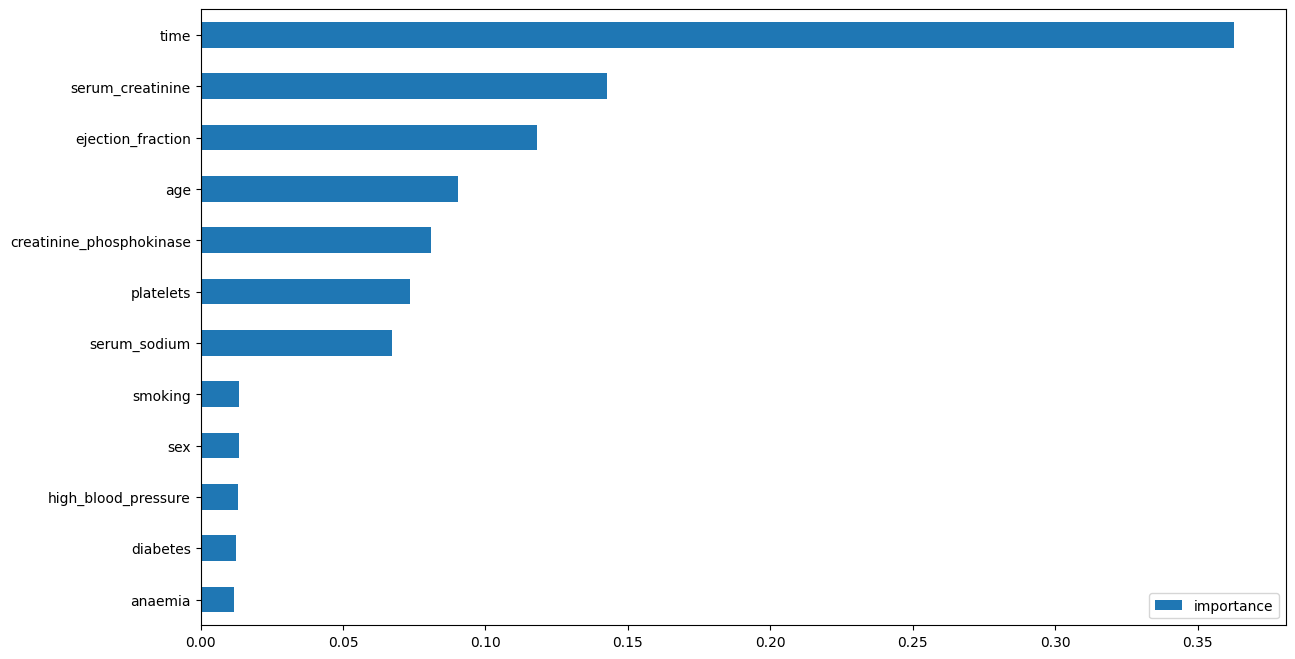

In [23]:
imp_values = feature_importances.sort_values('importance', ascending=True)
imp_values.plot.barh(figsize=(14,8), color='tab:blue')
plt.show()

In [24]:
feature_importances

,importance
time,0.362765
serum_creatinine,0.142728
ejection_fraction,0.118082
age,0.090439
creatinine_phosphokinase,0.080725
platelets,0.073556
serum_sodium,0.067234
smoking,0.013649
sex,0.013568
high_blood_pressure,0.013133


**Drop atribut**

In [25]:
df_features = df.drop(columns=['creatinine_phosphokinase', 'platelets', 'serum_sodium',
                                     'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia'])

**Determine X & y**

In [26]:
X = df_features.iloc[:, :-1]
y = df_features.iloc[:, -1]
print(X.shape)
print(y.shape)

(299, 4)
(299,)


**Splitting and train data**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

**Fitting model**

In [28]:
model = rf.fit(X_train, y_train)

**Evaluate Data**

In [29]:
y_pred = model.predict(X_test)
print(f"Train Data Score: {model.score(X_train, y_train)}")
print(f"Test Data Score: {model.score(X_test, y_test)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Train Data Score: 1.0
Test Data Score: 0.8333333333333334

Confusion Matrix:
[[38  3]
 [ 7 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



In [30]:
def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1-Score: ", f1_score(y_test, y_pred))

In [31]:
evaluate_model(y_test, y_pred)

Accuracy Score:  0.8333333333333334
Precision Score:  0.8
Recall Score:  0.631578947368421
F1-Score:  0.7058823529411765


In [34]:
accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
precision = round(precision_score(y_test, y_pred), 4) * 100
recall = round(recall_score(y_test, y_pred), 4) * 100
f1score = round(f1_score(y_test, y_pred), 4) * 100

index = ['Random Forest']
data = {'Accuracy %' : accuracy, 'Precision %' : precision,
            'Recall %' : recall, 'F1-Score %' : f1score}

df_metrics = pd.DataFrame(data=data, index=index)
df_metrics = np.transpose(df_metrics)

In [35]:
df_rfs_metrics = pd.concat([df_metrics], axis=1)
df_rfs_metrics 

,Random Forest
Accuracy %,83.33
Precision %,80.00
Recall %,63.16
F1-Score %,70.59


# Overall Analysis
1. Semakin tua seseorang maka berpeluang juga untuk terkena serangan jantung.
2. Terdapat 4 fitur dengan korelasi tertinggi yaitu time, serum_creatinine, ejection_fraction, dan age.
3. Fitur - fitur yang tidak berhubungan dengan jantung, seperti diabetes, gender, dan merokok kurang memberi pengaruh terhadap kemungkinan terkena serangan jantung.
4. Pada model Random Forest ini menggunakan 4 fitur yang paling berkorelasi terhadap kemungkinan terkena serangan jantung, yakni : 'age', 'ejection_fraction', 'serum_creatinine', 'time'.
5. Seseorang yang sudah dibantu oleh tenaga kesehatan sejak lama (> ~75 hari) lebih banyak peluang hidup dibandingkan mereka yang baru saja sebentar dibantu (<= ~75 hari).
6. Jumlah serum creatinine yang sudah melebihi 1 mg/dL lebih mudah terkena serangan jantung.
7. Persentase ejection fraction yang sudah dibawah 30% berpeluang terkena serangan jantung.